In [4]:
import csv
import pandas as pd
from load_clean_review import load_and_clean_reviews

PATH = "data/Digital_Video_Games.tsv"
df = load_and_clean_reviews(PATH)

In [5]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,21269168,RSH1OZ87OYK92,B013PURRZW,603406193,Madden NFL 16 - Xbox One Digital Code,Digital_Video_Games,2,2,3,False,False,A slight improvement from last year.,I keep buying madden every year hoping they ge...,2015-08-31
1,US,133437,R1WFOQ3N9BO65I,B00F4CEHNK,341969535,Xbox Live Gift Card,Digital_Video_Games,5,0,0,False,True,Five Stars,Awesome,2015-08-31
2,US,45765011,R3YOOS71KM5M9,B00DNHLFQA,951665344,Command & Conquer The Ultimate Collection [Ins...,Digital_Video_Games,5,0,0,False,True,Hail to the great Yuri!,If you are prepping for the end of the world t...,2015-08-31
3,US,113118,R3R14UATT3OUFU,B004RMK5QG,395682204,Playstation Plus Subscription,Digital_Video_Games,5,0,0,False,True,Five Stars,Perfect,2015-08-31
4,US,22151364,RV2W9SGDNQA2C,B00G9BNLQE,640460561,Saints Row IV - Enter The Dominatrix [Online G...,Digital_Video_Games,5,0,0,False,True,Five Stars,Awesome!,2015-08-31


In [7]:
min_date = df["review_date"].min()
max_date = df["review_date"].max()

print("Earliest review:", min_date)
print("Latest review:", max_date)



# Extract year and month as separate columns
df["year"] = df["review_date"].dt.year
df["month"] = df["review_date"].dt.month

# Group by year and collect unique months
months_per_year = df.groupby("year")["month"].unique()

print(months_per_year)

print(months_per_year.loc[2012.0])

Earliest review: 2006-08-08 00:00:00
Latest review: 2015-08-31 00:00:00
year
2006.0                                                [8.0]
2008.0                                          [12.0, 9.0]
2009.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2010.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2011.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2012.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2013.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2014.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2015.0             [8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
Name: month, dtype: object
[12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


In [8]:

df_2012 = df[df["review_date"].dt.year == 2012].copy()

df_2012


df_2012["review_length"] = df_2012["review_body"].fillna("").str.split().str.len()
df_2012 = df_2012[df_2012["review_length"] > 0]

df_2012["length_bin"] = pd.qcut(
    df_2012["review_length"], q=3, labels=["short", "medium", "long"], duplicates="drop"
)

df_2012

target_n = 4000
labels = ["short", "medium", "long"]

per = target_n // len(labels)   # base quota per bucket (≈ 1333)
rem = target_n - per * len(labels)   # leftover rows to distribute


parts = []
for i, label in enumerate(labels):
    want = per + (1 if i < rem else 0)  # bucket-specific quota
    have = (df_2012["length_bin"] == label).sum()  # how many rows exist in that bucket
    take = min(want, have)  # don’t over-ask if bucket is too small
    if take > 0:
        parts.append(
            df_2012[df_2012["length_bin"] == label].sample(n=take, random_state=42)
        )

sampled_df = pd.concat(parts)

sampled_df

shuffled_df = (
    sampled_df
      .sample(frac=1, random_state=42)  
      .reset_index(drop=True)          
)

shuffled_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,month,review_length,length_bin
0,US,44162858,R1NNKWYXZJPPV7,B003N9BJV4,308771935,The Tomorrow War,Digital_Video_Games,4,0,0,False,True,Steep learning curve.,"Game has a very steep learning curve, especial...",2012-12-15,2012.0,12.0,23,short
1,US,40955995,R2ZNMDC59U5L4O,B001LRQ8TI,1190687,Geometry Wars Evolved² [Online Game Code],Digital_Video_Games,4,0,0,False,False,An awesome sequel with tons of modes,"The Good: 5 new game modes, Geoms help add to ...",2012-03-28,2012.0,3.0,437,long
2,US,43822790,R3FR6Q40XELSF6,B001QCWQ8K,772916441,Slingo Supreme [Download],Digital_Video_Games,1,0,0,False,True,Not what I thought I was ordering,i thought I was buying this for my Kindle Fire...,2012-12-23,2012.0,12.0,33,short
3,US,34389881,R31PWU4MT0KX4X,B00A2XA3GG,333671446,LEGO Lord of the Rings,Digital_Video_Games,5,2,4,False,False,Best Lego Game this far,I am glad these games are experiencing some ch...,2012-12-27,2012.0,12.0,166,long
4,US,30649350,RD1GMXK71DLXM,B00457VJ3G,341178582,SimCity 4 Deluxe Edition with Rush Hour Expans...,Digital_Video_Games,1,4,10,False,True,No raod access when homes are built,I purchased this game as part of my business e...,2012-12-30,2012.0,12.0,214,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,US,31081091,RQOSG1GG7KM9C,B0040RV3AU,350754770,"City Sights: Hello, Seattle! [Download]",Digital_Video_Games,3,0,0,False,True,Fast & fun,I enjoy this game when I want to block everyth...,2012-01-01,2012.0,1.0,30,short
3996,US,16094275,R1BJ6OS70OLN8C,B009YL65Q4,49538591,The Harry Batman Pack [Online Game Code],Digital_Video_Games,5,0,0,False,True,The Harry Batman Pack [Download],Everything was great. It downloaded fine and v...,2012-12-11,2012.0,12.0,22,short
3997,US,17344682,R24GVJ3IR76R30,B002VBWIP6,232803743,Xbox Live Subscription,Digital_Video_Games,5,0,0,False,True,Worth it.,I've been a gold member for 4 years and it is ...,2012-12-24,2012.0,12.0,21,short
3998,US,52842058,RRNCIQGC0I8MK,B004NBZBME,544485504,Homefront,Digital_Video_Games,4,0,0,False,True,"Scary realism, short game","Man, could this really happen? The premise of...",2012-12-20,2012.0,12.0,171,long


In [11]:
# Recreate qcut but keep the Interval objects
bins = pd.qcut(df_2012["review_length"], q=3, duplicates="drop")

# Look at unique intervals
print(bins.cat.categories)

IntervalIndex([(0.999, 34.0], (34.0, 82.0], (82.0, 4564.0]], dtype='interval[float64, right]')


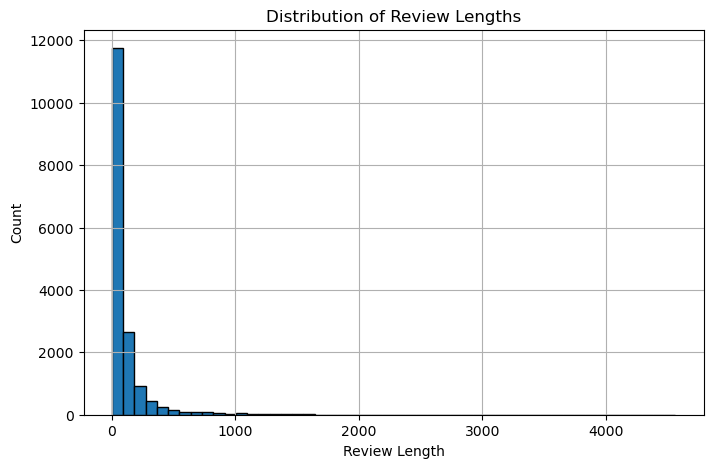

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df_2012["review_length"].hist(bins=50, edgecolor="black")
plt.xlabel("Review Length")
plt.ylabel("Count")
plt.title("Distribution of Review Lengths")
plt.show()

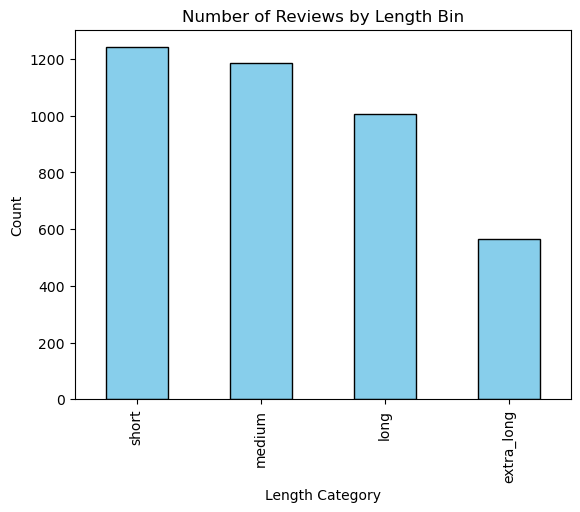

In [23]:
df_2012["length_bin"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Length Category")
plt.ylabel("Count")
plt.title("Number of Reviews by Length Bin")
plt.show()

In [22]:
from month_bin_shuffle import add_length_info, stratified_sample_by_month_and_bin

df_2012 = df[df["review_date"].dt.year == 2012].copy()

df_2012 = add_length_info(df_2012)
df_2012 = stratified_sample_by_month_and_bin(df_2012, target_n=4000)

df_2012


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,month,review_length,length_bin
0,US,34309783,RXD0X5H0LQ28U,B0069TK0VU,293049727,Magicka Ultimate Pack [Download],Digital_Video_Games,5,19,20,False,False,Extremely fun and addictive gameplay,I was completely out of the loop when Magicka ...,2012-02-16,2012.0,2012-02,476,long
1,US,25647490,R3MWHNDAG1VGMV,B0081JZJEY,162057022,Tom Clancy's Ghost Recon Future Soldier,Digital_Video_Games,5,1,1,False,True,Tom Clancy's Ghost Recon-Future Soldier,This is a great game and really fun to play. ...,2012-11-06,2012.0,2012-11,260,long
2,US,27396311,R11RXYJSARU4GQ,B005HRZ29K,832660030,Deus Ex: Human Revolution - Standard Edition [...,Digital_Video_Games,4,0,1,False,True,"Definitely a must for Deus ex fans, but shows ...",Positives: Anyone who enjoyed the original Deu...,2012-02-08,2012.0,2012-02,305,long
3,US,46141841,R3EM5G1KBBWCOT,B002ASAGXG,636159034,Wedding Dash [Download],Digital_Video_Games,5,2,2,False,True,Very addictive!,This may seem like a simple game with simple g...,2012-12-10,2012.0,2012-12,212,long
4,US,50049180,R1XORQIGIUWBDN,B008Y1XJFU,306865365,Batman Arkham City,Digital_Video_Games,5,0,0,False,False,Great game!,I recently purchased this game during the spec...,2012-10-14,2012.0,2012-10,91,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,US,32322068,R3GOKLNJ6DHAYJ,B007JPKH16,430284991,Need For Speed World Starter Packs,Digital_Video_Games,1,2,4,False,False,buying but failing,As a veteran race game and nfs game player the...,2012-04-04,2012.0,2012-04,81,medium
3996,US,48423123,R24EZPQM9IKXYJ,B007977HM6,151163064,LA Noire,Digital_Video_Games,3,0,0,False,True,"Good game, great price, poor technical support","I finally managed to install it, but it took m...",2012-05-10,2012.0,2012-05,41,short
3997,US,45007851,R1Y9E5W6G05M5E,B0064TYNMW,417181779,Kingdoms of Amalur: Reckoning,Digital_Video_Games,3,3,5,False,True,"Fantastic combat, but a boring game",Title says it all. I have about 30 hours into ...,2012-03-25,2012.0,2012-03,377,long
3998,US,34616992,R19OY9UL6CPOQ3,B004D4YDNE,69625145,Grand Theft Auto IV - PC Download (Standard Ed...,Digital_Video_Games,3,1,1,False,True,got rooked,"Came with some Bug that you can't uninstall, d...",2012-11-21,2012.0,2012-11,300,long


In [24]:
LENGTH_BINS = [0, 50, 200, 500, float("inf")]
LENGTH_LABELS = ["short", "medium", "long", "extra_long"]
# --- Check bin ranges ---
for label, (low, high) in zip(LENGTH_LABELS, zip(LENGTH_BINS[:-1], LENGTH_BINS[1:])):
    upper = int(high) if high != float("inf") else "∞"
    print(f"{label:>10}: {low+1} – {upper} words")

# --- Count per (month × length_bin) ---
counts = df_2012.groupby(["month", "length_bin"]).size().unstack(fill_value=0)

print("\nCounts per (month × length_bin):")
print(counts)

# optional: quick totals per bin
print("\nTotals per bin:")
print(counts.sum(axis=0))

# optional: quick totals per month
print("\nTotals per month:")
print(counts.sum(axis=1))

     short: 1 – 50 words
    medium: 51 – 200 words
      long: 201 – 500 words
extra_long: 501 – ∞ words

Counts per (month × length_bin):
length_bin  short  medium  long  extra_long
month                                      
2012-01        97      97    84          32
2012-02        96      95    84          31
2012-03        94      97    84          76
2012-04        94      97    85          34
2012-05        93      96    83          48
2012-06        93      92    82          19
2012-07        97     100    84          52
2012-08        95      95    83          53
2012-09        96      96    83          53
2012-10       103      99    84          50
2012-11       121     107    85          58
2012-12       162     115    85          61

Totals per bin:
length_bin
short         1241
medium        1186
long          1006
extra_long     567
dtype: int64

Totals per month:
month
2012-01    310
2012-02    306
2012-03    351
2012-04    310
2012-05    320
2012-06    286
2012-07    3

/var/folders/zm/pz0q6_fn2zv0lr2bzbh6_8mc0000gn/T/ipykernel_22856/1777719214.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_2012.groupby(["month", "length_bin"]).size().unstack(fill_value=0)


In [25]:
df_2012.to_csv("video_game_2012.csv", index=False)